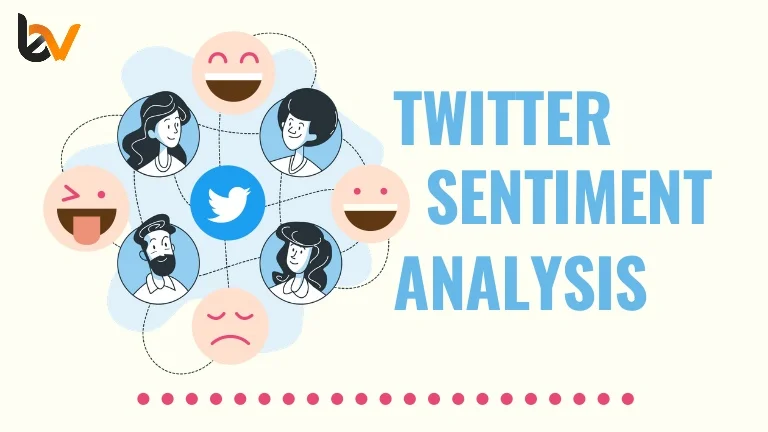

### I have divided my Project into Four parts:

1.   Sentiment of my own tweet

2.   Sentiment of tweet of any user
3.   Comparision of Sentiment of tweets of two users

2.   Sentiment of any keyword in tweets



### PART 1  SENTIMENT OF MY TWEET

---





In [ ]:
#IMPORTING LIBRARIES
from textblob import TextBlob # TextBlob is a Python library for processing textual data
import tweepy as tp

In [ ]:
rievew = input('Enter your Tweet: ')
blob1= TextBlob(rievew)

Enter your Tweet: good


In [ ]:
print(blob1.sentiment)
if (blob1.sentiment[0] >0 ):
  print("positive")
elif(blob1.sentiment[0] ==0 ):
  print("Neutral")
elif(blob1.sentiment[0] <0 ):
  print("Negative")

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
positive


###  PART 2  SENTIMENT OF TWEETS OF ANY USER

---



In [ ]:
consumer_key = 'Enter Yours' 
consumer_secret = 'Enter yours'
access_token = 'Enter yours'
access_token_secret = 'Enter yours'   

In [ ]:
auth = tp.OAuthHandler(consumer_key, consumer_secret)  
auth.set_access_token(access_token, access_token_secret) 
api = tp.API(auth)
tweets= api.home_timeline()

In [ ]:
# Some recent tweets
for tweet in tweets:
  print(tweet.text)

In [ ]:
# Libraries used
from tweepy import Stream
import pandas as pd
import sys
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tweepy import StreamListener
import json
from textblob import TextBlob
import re

In [ ]:
user = input("Enter the user name : ")
count= int(input("Enter no. of tweets you  want to see: "))

Enter the user name : BillGates
Enter no. of tweets you  want to see: 10


In [ ]:
posts = api.user_timeline(screen_name = user, count =100, lang= "en", tweet_mode ="extended")

print("Showing "+str(count)+ " recent tweets of "+ user +" : \n")
i=1
for tweet in posts[0:5]:
  print(str(i)+ ') '+ tweet.full_text + '\n')
  i=i+1

In [ ]:
#create a dataframe with a clumn called tweets
df= pd.DataFrame( [tweet.full_text for tweet in posts], columns =['Tweets'])

df.head()


In [ ]:
#clean the text 

#create a function to clean the tweets

def cleantxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text) #remove @mentions
  text= re.sub('#','', text) #removing'#' symbol
  text = re.sub(r'RT[\s]+', '', text) #removing RT--> Retweets
  text= re.sub(r'https?:\/\/\S+', '', text) #removing the hyper link

  return text

#cleaning the text
df['Tweets']= df['Tweets'].apply(cleantxt) 
df


In [ ]:
# create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity

def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns
df['Subjectivity']= df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)

df


In [ ]:
from pandas.core.common import random_state
# plot word cloud 
allWords = ' '.join([ twts for twts in df['Tweets']])
wordcloud = WordCloud(width =500, height=300, random_state= 0, max_font_size=120).generate(allWords)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:


def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']= df['Polarity'].apply(getAnalysis)
df

In [ ]:
# plot polarity and Subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis of '+ user+ " Tweets ")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [ ]:
# Get percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0]/df.shape[0])*100,1)

74.0

In [ ]:
# Get percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0]/df.shape[0])*100,1)

4.0

In [ ]:
#Show the value counts

df['Analysis'].value_counts()

plt.title('Sentiment Analysis of '+ user+ " Tweets ")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

### Part 3 Comaprision of Sentiments of tweets of two users

---



In [ ]:
input1 = input("Enter name of user 1: ")
input2 =input("Enter name of user 2: ")

Enter name of user 1: Trump
Enter name of user 2: Modi


In [ ]:
tweets1 = api.search(input1,count=100,lang='en')
tweets2 = api.search(input1,count=100,lang='en')

In [ ]:

Analysis1 = []
Polarity1 = []
for i in tweets1:
    analysis = TextBlob(i.text)
    Analysis1.append(analysis.sentiment)
    Polarity1.append(analysis.sentiment[0])

analysis=[]
Analysis2 = []
Polarity2 = []
for TrumpTweet in tweets2:
    analysis = TextBlob(TrumpTweet.text)
    Analysis2.append(analysis.sentiment)
    Polarity2.append(analysis.sentiment[0])

In [ ]:
x = np.arange(0,100)
plt.scatter(x,Polarity1,label=input1)
plt.scatter(x,Polarity2, label=input2)
plt.xlabel('Tweets')
plt.ylabel('Happiness')
plt.title('Sentiment analysis')
plt.legend()
plt.show()


In [ ]:
Polarity1 = [i for i in Polarity1 if i != 0]
Polarity2 = [i for i in Polarity2 if i != 0]

minTweets = min(len(Polarity1),len(Polarity2))

x = np.arange(0,minTweets)

Polarity1 = Polarity1[0:minTweets]
Polarity2 = Polarity2[0:minTweets]

print (minTweets)

50


In [ ]:
plt.scatter(x,Polarity1,label=input1)
plt.scatter(x,Polarity2,label=input2)
plt.xlabel('Tweet index')
plt.ylabel('Happiness')
plt.title('Sentiment analysis')
plt.legend()
plt.show()

### Part 4  Sentiment of any keyword in tweets

---



In [ ]:
search= input("Enter keyword/hashtag to search about: ")
noOfSearchTerms = int(input("Enter how many tweets to analyse: "))


Enter keyword/hashtag to search about: bitcoin
Enter how many tweets to analyse: 100


In [ ]:
posts1 = api.user_timeline(screen_name = search, count =100, lang= "en", tweet_mode ="extended")

print("Showing "+str(noOfSearchTerms)+ " recent tweets of "+ search +" : \n")
i=1
for tweet in posts1[1:(noOfSearchTerms+1)]:
  print(str(i)+ ') '+ tweet.full_text + '\n')
  i=i+1

Let's see how people are reacting on bitcoin by analysing 100 Tweets.
Positive


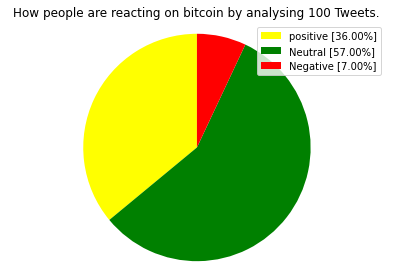

In [ ]:


consumer_key = 'Enter Yours' 
consumer_secret = 'Enter Yours'
access_token = 'Enter Yours'
access_token_secret = 'Enter Yours'

auth = tp.OAuthHandler(consumer_key, consumer_secret)  
auth.set_access_token(access_token, access_token_secret) 
api = tp.API(auth)   

tweets = tp.Cursor(api.search, q=search).items(noOfSearchTerms)

positive = 0
negative = 0
neutral= 0
polarity =0


for tweet in tweets:
  # print(tweet.text)
  analysis = TextBlob(tweet.text)
  polarity +=analysis.sentiment.polarity

  if(analysis.sentiment.polarity == 0):
    neutral+=1
  elif(analysis.sentiment.polarity < 0.00):
    negative+=1
  elif(analysis.sentiment.polarity >0.00):
    positive+=1

def percentage(part,whole):
  return 100*float(part)/float(whole)

positive =percentage(positive, noOfSearchTerms)
negative =percentage(negative, noOfSearchTerms)
neutral =percentage(neutral, noOfSearchTerms)
polarity =percentage(polarity, noOfSearchTerms)

positive = format(positive, '.2f')
neutral = format(neutral, '.2f')
negative = format(negative, '.2f')


print("Let's see how people are reacting on "+ search + " by analysing " + str(noOfSearchTerms)+ " Tweets.")
if(polarity ==0):
  print("Neutral")
elif(polarity < 0.00):
  print("Negative")
elif(polarity >0.00):
  print("Positive")


labels = ['positive [' + str(positive)+ '%]', 'Neutral [' + str(neutral) + '%]' , 'Negative [' +str(negative) +'%]']

sizes =[positive, neutral, negative]
colors = ['yellow', 'green', 'red']
patches,text = plt.pie(sizes , colors= colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("How people are reacting on "+ search + " by analysing " + str(noOfSearchTerms)+ " Tweets.")
plt.axis('equal')
plt.tight_layout()
plt.show()


In [ ]:
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(negative) + "% people thought it was negative")
print(str(neutral) + "% people thought it was neutral")


Detailed Report: 
36.00% people thought it was positive
7.00% people thought it was negative
57.00% people thought it was neutral


In [ ]:
## -------------------END---------------------------------------